In [1]:
import numpy as np
import pandas as pd
import pickle

from metric import *
from cstsne import cstsne
import seaborn as sns
import matplotlib.pylab as plt

# A synthetic dataset

In [2]:
# load the synthetic dataset
df = pd.read_csv('demo/demo_data.csv',encoding='utf-8')
# get feature values
X = df.loc[:, df.columns != 'y']

# load class probabilities
rf_probs = np.load('demo/rf_probs.npy')

# get n(number of data points) and m(number of classes)
n = X.shape[0]
m = rf_probs.shape[1]

# get predicted classes of instances
pred_y = []
for prob in rf_probs:
     y_tmp = 0
     prob_tmp = 0
     for i in np.arange(m):
          if prob[i]>prob_tmp:
               y_tmp=i
               prob_tmp=prob[i]
     pred_y.append(y_tmp)
    
# calculate pairwise distances of instances in terms of feature values
D_high_matrix = cal_D_matrix(X)

alpha= 0
trustworthiness is 0.9602340822959068
continuity is 0.9469373873047064
distance_consistency is 0.15346534653465346
alpha= 0.25
trustworthiness is 0.9415891970876477
continuity is 0.9524727281888494
distance_consistency is 0.10643564356435643
alpha= 0.5
trustworthiness is 0.9202954101298898
continuity is 0.9428587624302234
distance_consistency is 0.04702970297029703
alpha= 0.75
trustworthiness is 0.8843741789664245
continuity is 0.9080883279167611
distance_consistency is 0.007425742574257425
alpha= 1
trustworthiness is 0.8508715102698928
continuity is 0.8535285098847943
distance_consistency is 0.007425742574257425


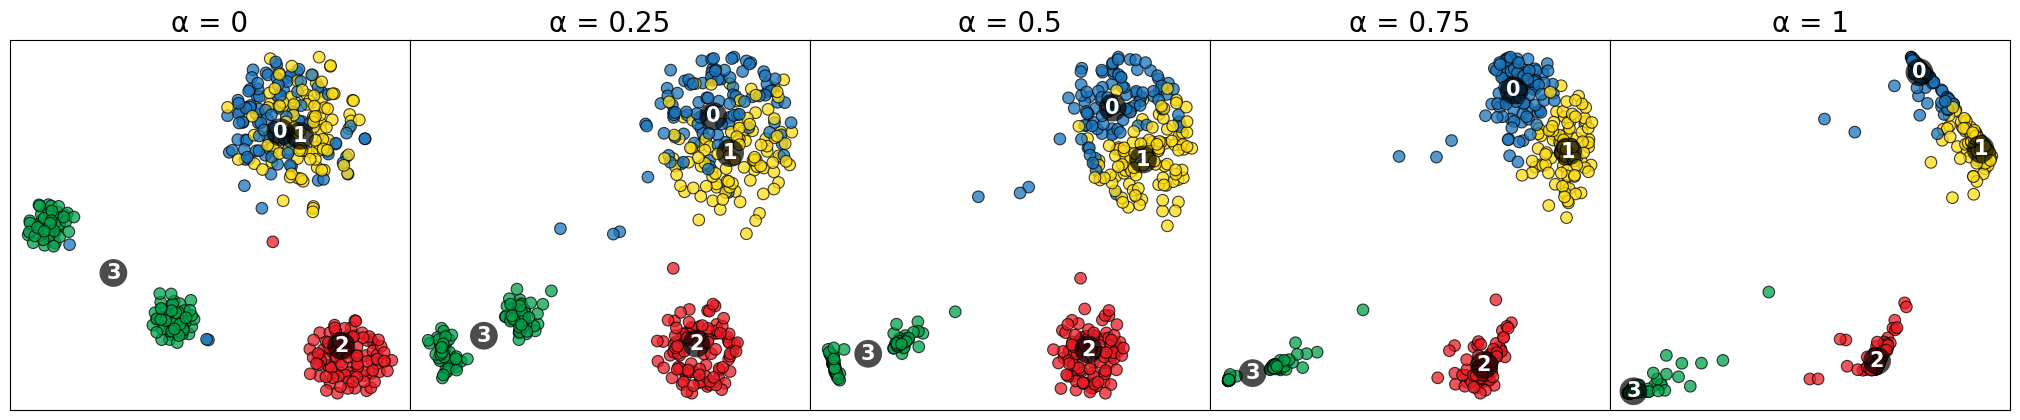

In [3]:
# initialize cstnse with "iteration", "perplexity", "initial iterations with early exaggeration"
tsne = cstsne(1000,30,250)
# set distance penalty weight lambda and distance measure('euclidean' or 'cosine')
tsne.set_lambda(0.5)
tsne.set_metric('euclidean')

# used to store quality metrics
trustworthiness = np.empty(5)
continuity = np.empty(5)
distance_consistency_centroid = np.empty(5)

fig, axs = plt.subplots(figsize=(20,4),ncols=5,nrows=1)

# iterate 5 alpha values from 0 to 1
alpha = [0,0.25,0.5,0.75,1]
for i in np.arange(5):
     axs[i].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
     print("alpha=",alpha[i])

     # set alpha value
     tsne.set_alpha(alpha[i])

     # if it is the first time of computation we use random positions to initialize data points and compute results with early exaggeration
     if i==0:
          result =  tsne.fit_transform(X, rf_probs)
     # or else we use the last projection results as initialization and compute without early exaggeration
     else:
          result = tsne.update_proj()

     # get 2D embedding of data points and class landmarks
     points, classes = result[:n*2], result[n*2:]
     points = points.reshape((n,2))
     classes = classes.reshape((m,2))

     # calculate pairwise distances of instances in terms of 2D embedding
     D_low_matrix = cal_D_matrix(points)

     # compute three quality metrics
     trustworthiness[i] = metric_trustworthiness(7,D_high_matrix,D_low_matrix)
     print('trustworthiness is', trustworthiness[i])

     continuity[i] = metric_continuity(7,D_high_matrix,D_low_matrix)
     print('continuity is', continuity[i])

     centroids = cal_centroids(pred_y, points)
     D_pc = cal_D(points,centroids)
     distance_consistency_centroid[i] = metric_dsc(pred_y, D_pc)
     print('distance_consistency is', distance_consistency_centroid[i])

     # draw the projection results
     df["comp-1"] = points[:,0]
     df["comp-2"] = points[:,1]

     colors = [ "#1b75bb", "#ffdd15", "#ec1c24",  "#00a14b"]

     sns.scatterplot(x="comp-1", y="comp-2", hue=pred_y,
                    palette=colors, s=70,
                    data=df, legend=False, alpha=0.75, ax=axs[i], edgecolor="black",linewidth=0.8).set_title("\u03B1 = "+str(alpha[i]),fontsize=20)

     sns.scatterplot(x=classes[:,0], y=classes[:,1], alpha=0.7,
                    color="black", marker= "o", s =400, legend=False, ax=axs[i],edgecolor="none")

     for j in np.arange(m):
          axs[i].text(classes[j,0], classes[j,1], j, fontsize=15, horizontalalignment='center', verticalalignment='center', color='white', weight='semibold')

fig.tight_layout(pad=0)

# fashion MNIST dataset

In [4]:
# load the fashion MNIST dataset
with open('fashion/fashion_train.pickle', 'rb') as handle:
    train_data = pickle.load(handle) 
datatype = 'image'
X = train_data['data']/255
labelnames = train_data['target_names']

# load class probabilities
predicted_classes = np.load('fashion/fashion_probs.npy')

n = np.size(predicted_classes,axis=0)
m = np.size(predicted_classes,axis=1)

# get predicted class from probabilities
predicted_y = []
for probs in predicted_classes:
    y_tmp = 0
    prob_tmp=0
    for i in np.arange(m):
        if probs[i]>prob_tmp:
            prob_tmp=probs[i]
            y_tmp = i
    predicted_y.append(y_tmp)

df = pd.DataFrame(predicted_y,columns=['y'])

# calculate pairwise distances of instances in terms of feature values
D_high_matrix = cal_D_matrix(X)

alpha= 0
trustworthiness is 0.9886945618307489
continuity is 0.9858522902266948
distance_consistency is 0.28
alpha= 0.25
trustworthiness is 0.9780973301579343
continuity is 0.977102684167174
distance_consistency is 0.18075
alpha= 0.5
trustworthiness is 0.9668418149912259
continuity is 0.9726317014647423
distance_consistency is 0.098
alpha= 0.75
trustworthiness is 0.9288306324535329
continuity is 0.9587955717508864
distance_consistency is 0.0385
alpha= 1
trustworthiness is 0.8498478583963041
continuity is 0.9294400315152384
distance_consistency is 0.0175


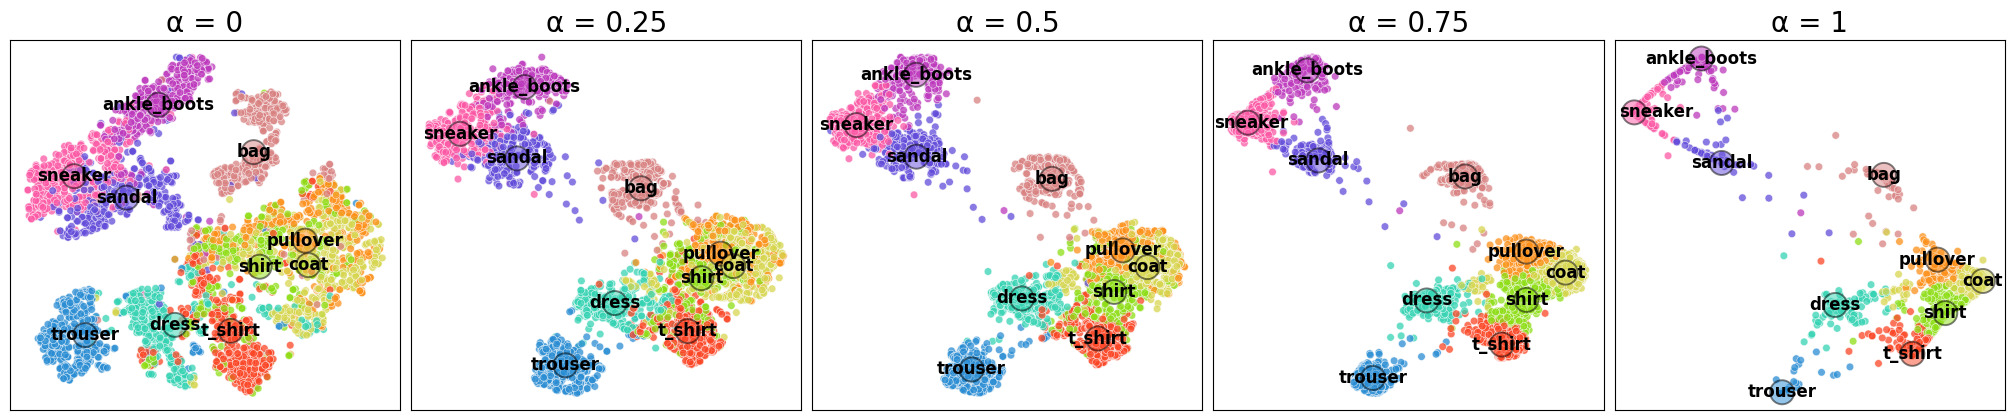

In [5]:
# initialize cstnse with "iteration", "perplexity", "initial iterations with early exaggeration"
tsne = cstsne(1000,30,250)
# set distance penalty weight lambda and distance measure('euclidean' or 'cosine')
tsne.set_lambda(0.5)
tsne.set_metric('euclidean')

trustworthiness = np.empty(5)
continuity = np.empty(5)
distance_consistency_centroid = np.empty(5)

fig, axs = plt.subplots(figsize=(20,4),ncols=5,nrows=1)
colors = ['#FB4626','#2A8DD3','#FD9019','#35D3B3','#d7d650','#624CDA','#8EDE16','#FC58A5','#D98282','#BD39BD']

alpha = [0,0.25,0.5,0.75,1]
# iterate 5 alpha values from 0 to 1
for i in np.arange(5):
     axs[i].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
     print("alpha=",alpha[i])

     # set alpha value
     tsne.set_alpha(alpha[i])

     # if it is the first time of computation we use random positions to initialize data points and compute results with early exaggeration
     if i==0:
          result =  tsne.fit_transform(X, predicted_classes)
     # or else we use the last projection results as initialization and compute without early exaggeration
     else:
          result = tsne.update_proj()
        
     # get 2D embedding of data points and class landmarks
     points, classes = result[:n*2], result[n*2:]
     points = points.reshape((n,2))
     classes = classes.reshape((m,2))

     # calculate pairwise distances of instances in terms of 2D embedding
     D_low_matrix = cal_D_matrix(points)

     trustworthiness[i] = metric_trustworthiness(7,D_high_matrix,D_low_matrix)
     print('trustworthiness is', trustworthiness[i])

     continuity[i] = metric_continuity(7,D_high_matrix,D_low_matrix)
     print('continuity is', continuity[i])

     centroids = cal_centroids(predicted_y, points)
     D_pc = cal_D(points,centroids)
     distance_consistency_centroid[i] = metric_dsc(predicted_y, D_pc)
     print('distance_consistency is', distance_consistency_centroid[i])


     # draw the projection results
     df["comp-1"] = points[:,0]
     df["comp-2"] = points[:,1]

     sns.scatterplot(x="comp-1", y="comp-2", hue=predicted_y,
                    palette=colors, s=30,
                    data=df, legend=False, alpha=0.75, ax=axs[i]).set_title("\u03B1 = "+str(alpha[i]),fontsize=20)

     sns.scatterplot(x=classes[:,0], y=classes[:,1], hue=np.arange(m).tolist(), alpha=0.5,
                    palette=colors, marker= "o", s =300, legend=False, ax=axs[i],edgecolor="black")

     for j in np.arange(m):
          align = 'center'
          tmpx = classes[j,0]
          tmpy = classes[j,1]

          if labelnames[j]=='sneaker':
               if i==4 :
                    tmpx += 1
               if i==3:
                    tmpx +=0.2

          axs[i].text(tmpx, tmpy, labelnames[j], horizontalalignment=align, verticalalignment='center', fontsize=12, color='black', weight='semibold')


fig.tight_layout(pad=0)

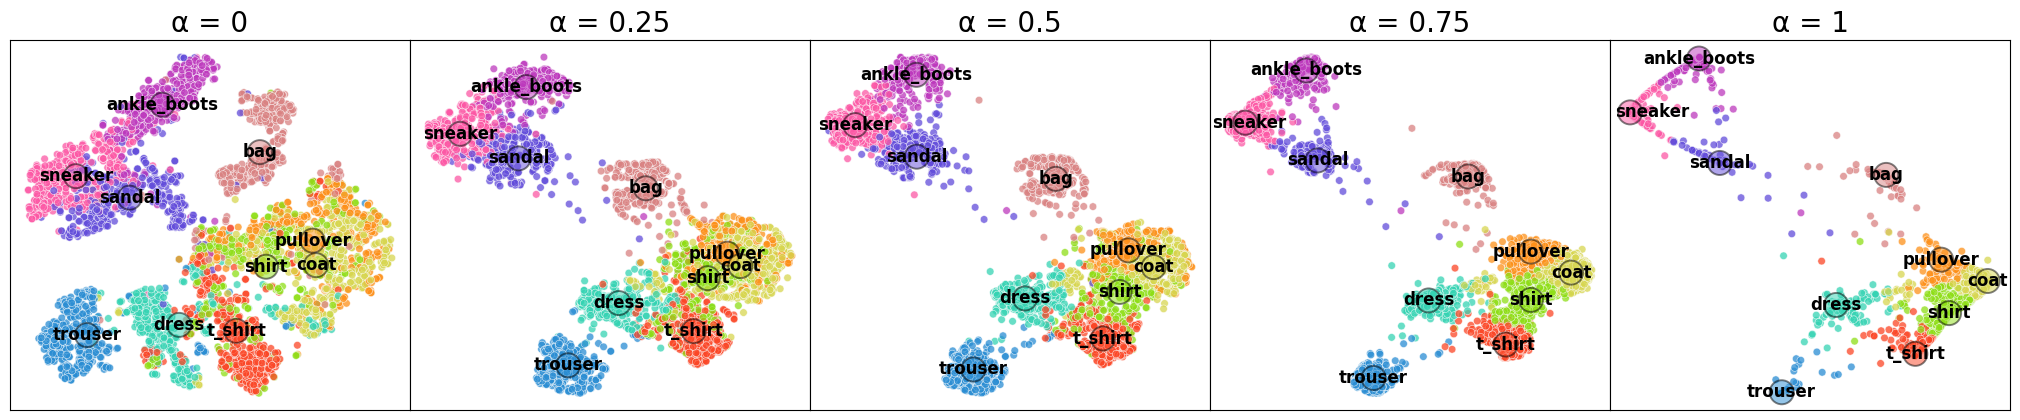

In [7]:
fig.tight_layout(pad=0)
fig